In [44]:
# Importig the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [45]:
# loading the dataset
gold_data = pd.read_csv('gld_price_data.csv')

In [46]:
# print first 5 rows in the DataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [47]:
# print last 5 rows of the DataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05/08/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05/09/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [48]:
# number of rows and column
gold_data.shape

(2290, 6)

In [49]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [50]:
# checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [51]:
# getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [52]:
# Finding correlation amongst the independents variable of this dataset
#Types of correlations: Positive and Negative Correlation
correlation = gold_data.corr()

<AxesSubplot:>

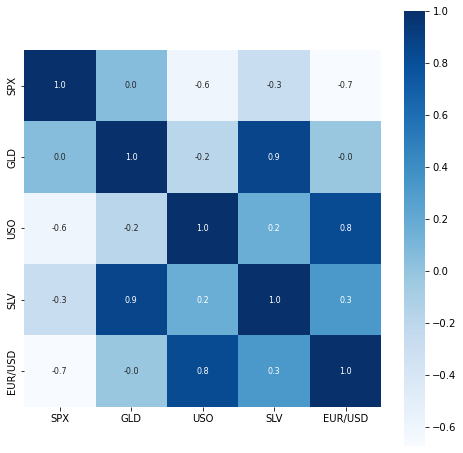

In [53]:
# Constructing a heatmap to understanding the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [54]:
# Correlation values of GLD 
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

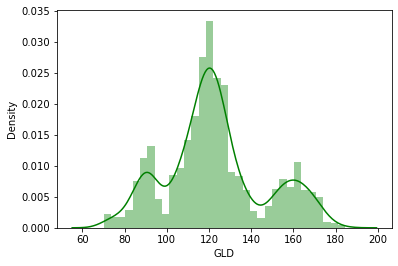

In [58]:
# Checking the distriution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [64]:
# Spliting the Features and Target (GLD)

X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [67]:
print(X)

print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [69]:
# Spliting into Training data and Test Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [71]:
# Model Training:
# We are going to use Forest Regressor

regressor = RandomForestRegressor(n_estimators=100)

In [74]:
# Training the model now

regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [76]:
# Model Evaluation

# Prediction on Test Data

test_data_prediction = regressor.predict(X_test)

In [78]:
print(test_data_prediction)

[168.76270002  81.926      116.02030028 127.76090075 120.76860094
 154.7757974  150.30469815 126.01920002 117.60709904 125.97120091
 116.87310104 171.82680115 141.55219884 167.98249829 115.2668998
 117.25130044 138.86010239 170.09790065 159.02100273 158.88120017
 155.09830008 125.30110003 175.16060008 156.90250338 125.17920055
  94.00799954  77.14090056 120.77339996 119.07889898 167.49919978
  88.0376003  125.34070021  91.15170055 117.76110039 121.0771992
 136.43480124 115.37140141 115.10160062 147.4807999  107.21050102
 104.76450242  87.06669772 126.5974008  117.72520016 155.05349867
 119.52979992 108.33480025 107.92389795  93.25070083 127.15099765
  75.28210026 113.62269919 121.33660032 111.30109937 118.92639876
 120.66759936 159.48950054 165.9033012  147.06429699  85.81359844
  94.33760061  86.73919926  90.32549994 119.13640083 126.45070056
 127.54390015 170.26730048 122.22529939 117.42109903  98.3331001
 168.32920165 143.14479863 133.02960258 121.17240229 121.10819932
 119.76360043

In [84]:
# R squared error

error_score = metrics.r2_score(Y_test, test_data_prediction)

print('R squared error :', error_score)

R squared error : 0.9892830411893843


In [86]:
# Compare Actual Values and Predicted Values in a Plot
# Convert Y_test into a list firstly. The below we handle that and convert it into a list

Y_test = list(Y_test)

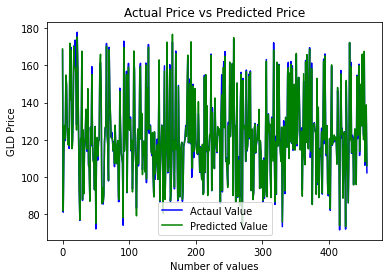

In [90]:
plt.plot(Y_test, color= 'blue', label = 'Actaul Value')
plt.plot(test_data_prediction, color= 'green', label= 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()